# Medidas de posição e dispersão

As medidas de posição e dispersão são fundamentais em estatística para descrever as características centrais e a variabilidade de dados. Este tópico aborda a importância de entender onde os dados tendem a concentrar-se e como eles variam, facilitando desde a análise exploratória até inferências estatísticas mais complexas.

## Base de dados

Antes de explorar as medidas de posição e dispersão, é essencial compreender a base de dados utilizada. Este tópico introduz os conjuntos de dados que serão analisados e discute a relevância de cada variável no contexto da análise estatística proposta.

In [1]:
import numpy as np
import statistics
from scipy import stats
import math
import matplotlib.pyplot as plt

In [2]:
dados = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
                  157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
                  163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
                  173])

## Média aritmética simples

In [3]:
dados.sum() / len(dados)

160.375

In [4]:
dados.mean()

160.375

In [5]:
statistics.mean(dados)

160

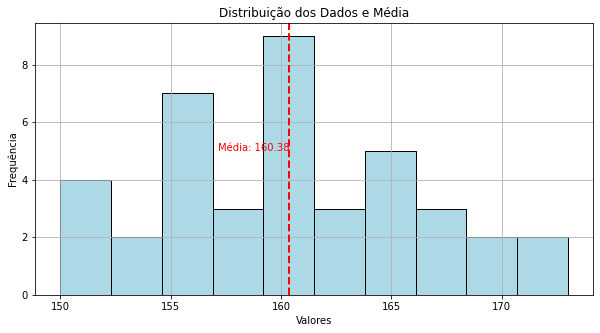

In [6]:
# Cálculo da média
media = dados.mean()

# Criando um gráfico para ilustrar a média
plt.figure(figsize=(10, 5))
plt.hist(dados, bins=10, color='lightblue', edgecolor='black')
plt.axvline(media, color='red', linestyle='dashed', linewidth=2)
plt.text(media, 5, f'Média: {media:.2f}', color='red', ha='right')
plt.title('Distribuição dos Dados e Média')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

## Moda

In [7]:
statistics.mode(dados)

160

In [8]:
stats.mode(dados)

ModeResult(mode=array([160]), count=array([5]))

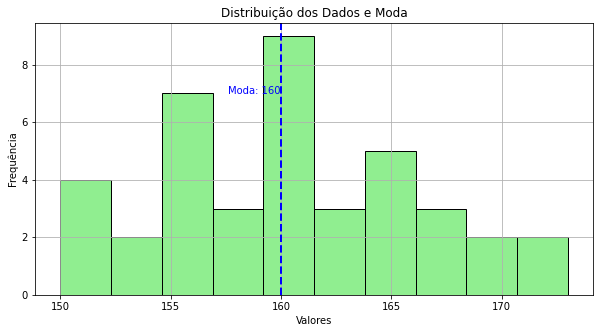

Moda (statistics): 160
Moda (scipy.stats): 160 com frequência de 5


In [9]:
# Cálculo da moda usando statistics e scipy.stats
moda_statistics = statistics.mode(dados)
moda_scipy = stats.mode(dados)

# Criando um gráfico para ilustrar a moda
plt.figure(figsize=(10, 5))
plt.hist(dados, bins=10, color='lightgreen', edgecolor='black')
plt.axvline(moda_statistics, color='blue', linestyle='dashed', linewidth=2)
plt.text(moda_statistics, 7, f'Moda: {moda_statistics}', color='blue', ha='right')
plt.title('Distribuição dos Dados e Moda')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Imprimindo os resultados
print("Moda (statistics):", moda_statistics)
print("Moda (scipy.stats):", moda_scipy.mode[0], "com frequência de", moda_scipy.count[0])

## Mediana

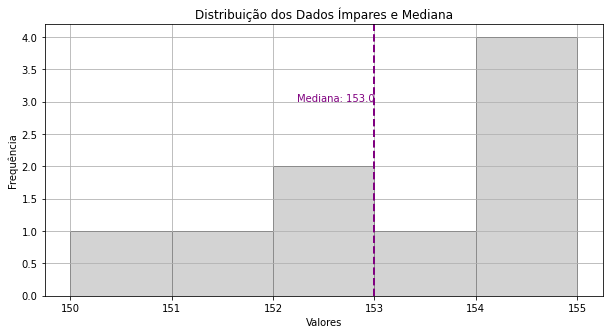

In [10]:
# Dados fornecidos para cálculo da mediana com número ímpar de elementos
dados_impar = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155])

# Cálculo da mediana usando numpy
mediana = np.median(dados_impar)

# Criando um gráfico para ilustrar a mediana
plt.figure(figsize=(10, 5))
plt.hist(dados_impar, bins=5, color='lightgrey', edgecolor='black')
plt.axvline(mediana, color='purple', linestyle='dashed', linewidth=2)
plt.text(mediana, 3, f'Mediana: {mediana}', color='purple', ha='right')
plt.title('Distribuição dos Dados Ímpares e Mediana')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

### Cálculo manual (ímpar)

In [11]:
posicao = len(dados_impar) / 2
posicao

4.5

In [12]:
posicao = math.ceil(posicao)
posicao

5

In [13]:
dados_impar[posicao - 1]

153

### Cálculo manual (par)

In [14]:
posicao = len(dados) // 2
posicao

20

In [15]:
dados[posicao - 1], dados[posicao]

(160, 160)

In [16]:
mediana = (dados[posicao - 1] + dados[posicao]) / 2
mediana

160.0

### Bibliotecas

In [17]:
np.median(dados_impar)

153.0

In [18]:
np.median(dados)

160.0

In [19]:
statistics.median(dados_impar)

153

In [20]:
statistics.median(dados)

160.0

## Média aritmética ponderada

A média aritmética ponderada é uma medida de tendência central em que cada elemento do conjunto de dados contribui proporcionalmente para o resultado final. Este tópico detalha seu cálculo e como ela é usada para avaliar conjuntos de dados onde alguns valores são mais influentes que outros.

In [21]:
notas = np.array([9, 8, 7, 3])
pesos = np.array([1, 2, 3, 4])

In [22]:
# Cálculo da média aritmética ponderada
media_ponderada_manual = (notas * pesos).sum() / pesos.sum()
media_ponderada_np = np.average(notas, weights=pesos)

# Imprimindo os resultados
print("Média Ponderada Calculada Manualmente:", media_ponderada_manual)
print("Média Ponderada Usando Numpy:", media_ponderada_np)

Média Ponderada Calculada Manualmente: 5.8
Média Ponderada Usando Numpy: 5.8


## Média aritmética, moda e mediana com distribuição de frequência (dados agrupados)

In [23]:
dados = {'inferior': [150, 154, 158, 162, 166, 170],
         'superior': [154, 158, 162, 166, 170, 174],
         'fi': [5, 9, 11, 7, 5, 3]}

In [24]:
import pandas as pd
dataset = pd.DataFrame(dados)
dataset

,inferior,superior,fi
0,150,154,5
1,154,158,9
2,158,162,11
3,162,166,7
4,166,170,5
5,170,174,3


In [25]:
dataset['xi'] = (dataset['superior'] + dataset['inferior']) / 2
dataset

,inferior,superior,fi,xi
0,150,154,5,152.0
1,154,158,9,156.0
2,158,162,11,160.0
3,162,166,7,164.0
4,166,170,5,168.0
5,170,174,3,172.0


In [26]:
dataset['fi.xi'] = dataset['fi'] * dataset['xi']
dataset

,inferior,superior,fi,xi,fi.xi
0,150,154,5,152.0,760.0
1,154,158,9,156.0,1404.0
2,158,162,11,160.0,1760.0
3,162,166,7,164.0,1148.0
4,166,170,5,168.0,840.0
5,170,174,3,172.0,516.0


In [27]:
dataset['Fi'] = 0
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,0
1,154,158,9,156.0,1404.0,0
2,158,162,11,160.0,1760.0,0
3,162,166,7,164.0,1148.0,0
4,166,170,5,168.0,840.0,0
5,170,174,3,172.0,516.0,0


In [28]:
frequencia_acumulada = []
somatorio = 0
for linha in dataset.iterrows():
  #print(linha[1])
  #print(linha[1][2])
  somatorio += linha[1][2]
  frequencia_acumulada.append(somatorio)

In [29]:
frequencia_acumulada

[5.0, 14.0, 25.0, 32.0, 37.0, 40.0]

In [30]:
dataset['Fi'] = frequencia_acumulada
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


### Média

In [31]:
dataset['fi'].sum(), dataset['fi.xi'].sum()

(40, 6428.0)

In [32]:
dataset['fi.xi'].sum() / dataset['fi'].sum()

160.7

### Moda

In [33]:
dataset['fi'].max()

11

In [34]:
dataset[dataset['fi'] == dataset['fi'].max()]

,inferior,superior,fi,xi,fi.xi,Fi
2,158,162,11,160.0,1760.0,25.0


In [35]:
dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]

160.0

### Mediana

In [36]:
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


In [37]:
fi_2 = dataset['fi'].sum() / 2
fi_2

20.0

In [38]:
limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
for linha in dataset.iterrows():
  #print(linha)
  limite_inferior = linha[1][0]
  frequencia_classe = linha[1][2]
  id_frequencia_anterior = linha[0]
  if linha[1][5] >= fi_2:
    id_frequencia_anterior -= 1
    break

In [39]:
limite_inferior, frequencia_classe, id_frequencia_anterior

(158.0, 11.0, 1)

In [40]:
Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
Fi_anterior

14.0

In [41]:
mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe
mediana

160.1818181818182

### Função completa

In [42]:
def get_estatisticas(dataframe):
  media = dataset['fi.xi'].sum() / dataset['fi'].sum()
  moda = dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]

  fi_2 = dataset['fi'].sum() / 2
  limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
  for i, linha in enumerate(dataset.iterrows()):
    limite_inferior = linha[1][0]
    frequencia_classe = linha[1][2]
    id_frequencia_anterior = linha[0]
    if linha[1][5] >= fi_2:
      id_frequencia_anterior -= 1
      break
  Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
  mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe

  return media, moda, mediana

In [43]:
get_estatisticas(dataset)

(160.7, 160.0, 160.1818181818182)

## Média geométrica, harmônica e quadrática

### Média geométrica

A média geométrica é uma medida de tendência central que é especialmente útil para conjuntos de dados que são multiplicativos ou que variam exponencialmente. Diferente da média aritmética, que soma os valores e depois os divide pelo número de observações, a média geométrica multiplica os valores e então extrai a raiz enésima (onde n é o número de valores). Essa medida é frequentemente utilizada em finanças para calcular taxas de retorno de investimentos, em ciências para medir o crescimento populacional ou em outras áreas onde os dados se multiplicam ao longo do tempo.

A fórmula para calcular a média geométrica de um conjunto de n valores positivos $x_1, x_2, \ldots, x_n$ é:

$$
GM = \sqrt[n]{x_1 \times x_2 \times \cdots \times x_n}
$$

onde:

- $GM$ é a média geométrica,

- $x_i$ são os valores do conjunto de dados,

- $n$ é o número de valores.

Para calcular a média geométrica:

1. Multiplique todos os valores do conjunto de dados.
2. Extraia a raiz enésima do produto obtido, onde n é o número total de valores.

#### Exemplo de Utilização:

- Finanças: A média geométrica é usada para calcular a taxa média de retorno de um investimento ao longo do tempo, especialmente quando os retornos são compostos. Por exemplo, se um investimento tem retornos anuais de 10%, 20%, e -10%, a média geométrica fornece uma melhor representação do retorno médio anual do que a média aritmética.

- Crescimento Populacional: Para medir o crescimento de uma população ao longo de várias etapas, onde o crescimento de cada etapa é multiplicativo.

#### Exemplo de cálculo

Se tivermos os valores \(2\), \(8\), e \(4\), a média geométrica será:

$$
GM = \sqrt[3]{2 \times 8 \times 4} = \sqrt[3]{64} = 4
$$

A média geométrica desses valores é 4.

A média geométrica é uma ferramenta poderosa quando trabalhamos com dados que crescem de maneira multiplicativa, pois proporciona uma representação mais precisa da tendência central desses dados.


In [44]:
from scipy.stats.mstats import gmean

In [45]:
dados = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
                  157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
                  163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
                  173])

In [46]:
gmean(dados)

160.26958390038902

### Média harmônica

A média harmônica é uma medida de tendência central que é especialmente útil quando se deseja calcular a média de taxas ou razões. É particularmente adequada para conjuntos de dados onde os valores são inversamente proporcionais, como velocidades médias ou densidades. Diferente da média aritmética, que soma os valores, a média harmônica se baseia nos recíprocos dos valores do conjunto de dados.

A fórmula para calcular a média harmônica de um conjunto de n valores positivos $x_1, x_2, \ldots, x_n$ é:

$$
HM = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}
$$

onde:

- $HM$ é a média harmônica,

- $x_i$ são os valores do conjunto de dados,

- $n$ é o número de valores.

Para calcular a média harmônica:

1. Calcule os recíprocos de todos os valores do conjunto de dados.
2. Some esses recíprocos.
3. Divida o número total de valores pela soma dos recíprocos.

#### Exemplo de Utilização:

- Velocidade Média: Quando se viaja a diferentes velocidades por diferentes distâncias, a média harmônica pode ser usada para calcular a velocidade média correta. Por exemplo, se um carro viaja metade da distância a 60 km/h e a outra metade a 40 km/h, a média harmônica das velocidades dá a velocidade média para a viagem completa.

- Densidade: Para calcular a densidade média de substâncias compostas por diferentes materiais com diferentes densidades.

#### Exemplo de cálculo

Se tivermos os valores \(2\), \(8\), e \(4\), a média harmônica será:

$$
HM = \frac{3}{\frac{1}{2} + \frac{1}{8} + \frac{1}{4}} = \frac{3}{0.5 + 0.125 + 0.25} = \frac{3}{0.875} \approx 3.43
$$

A média harmônica desses valores é aproximadamente 3.43.

A média harmônica é uma ferramenta poderosa quando trabalhamos com dados que envolvem taxas ou proporções, proporcionando uma representação mais precisa da tendência central desses dados quando comparados de maneira inversa.

In [47]:
from scipy.stats.mstats import hmean

In [48]:
hmean(dados)

160.16471947994674

### Média quadrática

A média quadrática, também conhecida como média das raízes quadráticas, é uma medida de tendência central que é particularmente útil para conjuntos de dados que contêm valores que variam ao redor de um valor central. É especialmente útil em contextos onde os valores podem ser tanto positivos quanto negativos e se deseja minimizar os efeitos dos valores extremos, como na análise de erros ou em estatísticas de dispersão.

A fórmula para calcular a média quadrática de um conjunto de n valores $x_1, x_2, \ldots, x_n$ é:

$$
QM = \sqrt{\frac{1}{n} \sum_{i=1}^{n} x_i^2}
$$

onde:

- $QM$ é a média quadrática,
- $x_i$ são os valores do conjunto de dados,
- $n$ é o número de valores.

Para calcular a média quadrática:

1. Eleve ao quadrado todos os valores do conjunto de dados.
2. Calcule a média aritmética desses quadrados.
3. Tire a raiz quadrada dessa média.

#### Exemplo de Utilização:

- Análise de Erros: Na engenharia e nas ciências, a média quadrática é usada para calcular o erro quadrático médio (RMS) de um conjunto de valores, que é uma medida da magnitude dos erros. Por exemplo, para avaliar a precisão de um modelo de previsão.
- Estatísticas de Dispersão: Para medir a variabilidade de dados ao redor de um valor central, a média quadrática é mais sensível a valores extremos do que a média aritmética.

#### Exemplo de cálculo:

Se tivermos os valores \(2\), \(8\), e \(4\), a média quadrática será:

$$
QM = \sqrt{\frac{1}{3} \left( 2^2 + 8^2 + 4^2 \right)} = \sqrt{\frac{1}{3} \left( 4 + 64 + 16 \right)} = \sqrt{\frac{84}{3}} = \sqrt{28} \approx 5.29
$$

A média quadrática desses valores é aproximadamente 5.29.

A média quadrática é uma ferramenta poderosa para trabalhar com dados que têm variações ao redor de um valor central, proporcionando uma representação mais precisa da tendência central desses dados, especialmente em contextos onde a magnitude dos valores é relevante.

In [49]:
def quadratic_mean(dados):
  return math.sqrt(sum(n * n for n in dados) / len(dados))

In [50]:
quadratic_mean(dados)

160.48091786876097

## Quartis

Quartis são valores que dividem um conjunto de dados ordenados em quatro partes iguais. Eles são usados para entender a distribuição e a dispersão dos dados, fornecendo uma visão detalhada sobre a posição relativa dos valores no conjunto de dados. Os quartis são:

- Primeiro Quartil (Q1): Também conhecido como o quartil inferior, é o valor abaixo do qual 25% dos dados estão localizados. Representa o ponto médio da metade inferior dos dados.
- Segundo Quartil (Q2): Também conhecido como a mediana, é o valor que divide o conjunto de dados ao meio, onde 50% dos valores estão abaixo e 50% estão acima.
- Terceiro Quartil (Q3): Também conhecido como o quartil superior, é o valor abaixo do qual 75% dos dados estão localizados. Representa o ponto médio da metade superior dos dados.

Os quartis ajudam a identificar a dispersão dos dados e detectar valores atípicos.

#### Exemplo com Dados Ímpares
Vamos calcular os quartis para o conjunto de dados dados_impar = [150, 151, 152, 152, 153, 154, 155, 155, 155] e gerar um gráfico para visualizá-los.

Primeiro, calculamos os quartis:

- Q1: Primeiro Quartil (25º percentil)
- Q2: Mediana (50º percentil)
- Q3: Terceiro Quartil (75º percentil)

Para calcular os quartis, vamos usar a fórmula da posição percentílica:

Q1: Posição = 0.25 * (n + 1)
Q2: Posição = 0.50 * (n + 1)
Q3: Posição = 0.75 * (n + 1)

- onde n é o número de observações no conjunto de dados.

In [51]:
dados_impar = [150, 151, 152, 152, 153, 154, 155, 155, 155]

In [52]:
# Calcular os quartis
Q1 = np.percentile(dados_impar, 25)
Q2 = np.median(dados_impar)
Q3 = np.percentile(dados_impar, 75)

Q1, Q2, Q3

(152.0, 153.0, 155.0)

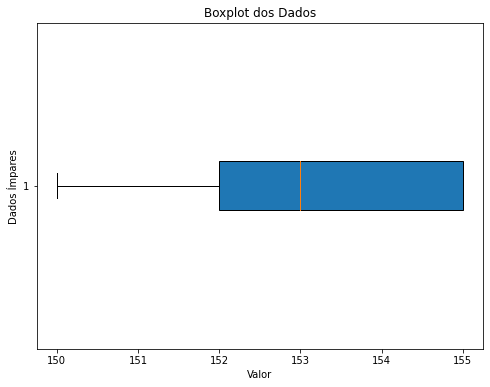

In [53]:
# Gerar o gráfico boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(dados_impar, vert=False, patch_artist=True)
plt.title('Boxplot dos Dados')
plt.xlabel('Valor')
plt.ylabel('Dados Ímpares')
plt.show()

#### Explicação dos Quartis no Gráfico
- Q1 (Primeiro Quartil): Está localizado no ponto onde 25% dos valores estão abaixo deste valor. Para os dados fornecidos, Q1 é aproximadamente 152.
- Q2 (Mediana): Divide o conjunto de dados ao meio. Para os dados fornecidos, a mediana (Q2) é 153.
- Q3 (Terceiro Quartil): Está localizado no ponto onde 75% dos valores estão abaixo deste valor. Para os dados fornecidos, Q3 é aproximadamente 155.

O gráfico boxplot mostra a distribuição dos dados, destacando os quartis e possíveis valores atípicos. A linha dentro da caixa representa a mediana (Q2), as bordas da caixa representam Q1 e Q3, e os "bigodes" (linhas que se estendem das caixas) representam o alcance interquartil estendido até os valores mínimos e máximos dentro de 1.5 vezes o intervalo interquartil.

#### Cálculo manual

In [54]:
np.median(dados_impar)

153.0

In [55]:
posicao_mediana = math.floor(len(dados_impar) / 2)
posicao_mediana

4

In [56]:
esquerda = dados_impar[0:posicao_mediana]
esquerda

[150, 151, 152, 152]

In [57]:
np.median(esquerda)

151.5

In [58]:
direita = dados_impar[posicao_mediana + 1:]
direita

[154, 155, 155, 155]

In [59]:
np.median(direita)

155.0

### Bibliotecas

#### numpy

In [60]:
np.quantile(dados_impar, 0.5)

153.0

In [61]:
np.quantile(dados_impar, 0.75)

155.0

In [62]:
np.quantile(dados_impar, 0.25)

152.0

In [63]:
esquerda2 = dados_impar[0:posicao_mediana + 1]
esquerda2

[150, 151, 152, 152, 153]

In [64]:
np.median(esquerda2)

152.0

In [65]:
np.quantile(dados, 0.25), np.quantile(dados, 0.50), np.quantile(dados, 0.75)

(155.75, 160.0, 164.0)

#### scipy

In [66]:
stats.scoreatpercentile(dados, 25), stats.scoreatpercentile(dados, 50), stats.scoreatpercentile(dados, 75)

(155.75, 160.0, 164.0)

#### pandas

In [67]:
import pandas as pd
dataset = pd.DataFrame(dados)
dataset.head()

,0
0,150
1,151
2,152
3,152
4,153


In [68]:
dataset.quantile([0.25, 0.5, 0.75])

,0
0.25,155.75
0.50,160.00
0.75,164.00


In [69]:
dataset.describe()

,0
count,40.000000
mean,160.375000
std,5.903877
min,150.000000
25%,155.750000
50%,160.000000
75%,164.000000
max,173.000000


## Quartis com distribuição de frequência (dados agrupados)

In [70]:
dados = {'inferior': [150, 154, 158, 162, 166, 170],
         'superior': [154, 158, 162, 166, 170, 174],
         'fi': [5, 9, 11, 7, 5, 3]}

import pandas as pd
dataset = pd.DataFrame(dados)
dataset['xi'] = (dataset['superior'] + dataset['inferior']) / 2
dataset['fi.xi'] = dataset['fi'] * dataset['xi']
dataset['Fi'] = 0
frequencia_acumulada = []
somatorio = 0
for linha in dataset.iterrows():
  #print(linha[1])
  #print(linha[1][2])
  somatorio += linha[1][2]
  frequencia_acumulada.append(somatorio)

dataset['Fi'] = frequencia_acumulada
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


In [71]:
def get_quartil(dataframe, q1 = True):
  if q1 == True:
    fi_4 = dataset['fi'].sum() / 4
  else:
    fi_4 = (3 * dataset['fi'].sum()) / 4

  limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
  for linha in dataset.iterrows():
    limite_inferior = linha[1][0]
    frequencia_classe = linha[1][2]
    id_frequencia_anterior = linha[0]
    if linha[1][5] >= fi_4:
      id_frequencia_anterior -= 1
      break
  Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
  q = limite_inferior + ((fi_4 - Fi_anterior) * 4) / frequencia_classe

  return q

In [72]:
get_quartil(dados), get_quartil(dados, q1 = False)

(156.22222222222223, 164.85714285714286)

## Percentis

In [73]:
dados = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
                  157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
                  163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
                  173])

In [74]:
np.median(dados)

160.0

In [75]:
np.quantile(dados, 0.5)

160.0

In [76]:
np.percentile(dados, 50)

160.0

In [77]:
np.percentile(dados, 5), np.percentile(dados, 10), np.percentile(dados, 90)

(151.95, 152.9, 168.1)

In [78]:
stats.scoreatpercentile(dados, 5), stats.scoreatpercentile(dados, 10), stats.scoreatpercentile(dados, 90)

(151.95000000000002, 152.89999999999998, 168.1)

In [79]:
import pandas as pd
dataset = pd.DataFrame(dados)
dataset.head()

,0
0,150
1,151
2,152
3,152
4,153


In [80]:
dataset.quantile([0.05, 0.10, 0.90])

,0
0.05,151.95
0.10,152.90
0.90,168.10


## Exercício

In [81]:
dataset = pd.read_csv('census.csv')

In [82]:
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [83]:
#média
dataset['age'].mean()

38.58164675532078

In [84]:
#média harmonica
stats.hmean(dataset['age'])

33.91874139089839

In [85]:
#media geometrica
from scipy.stats.mstats import gmean
gmean(dataset['age'])

36.210879158177256

In [86]:
#media quadratica
quadratic_mean(dataset['age'])

40.9218664329987

In [87]:
#mediana
dataset['age'].median()

37.0

In [88]:
#moda
statistics.mode(dataset['age'])

36

## Medidas de dispersão

### Amplitude total e diferença interquartil

In [89]:
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

#### Amplitude total

In [90]:
dados.max() - dados.min()

23

In [91]:
q1 = np.quantile(dados, 0.25)
q3 = np.quantile(dados, 0.75)
q1, q3

(155.75, 164.0)

#### Diferença interquartil

In [92]:
diferenca_interquartil = q3 - q1
diferenca_interquartil

8.25

#### Outliers

In [93]:
inferior = q1 - (1.5 * diferenca_interquartil)
inferior

143.375

In [94]:
superior = q3 + (1.5 * diferenca_interquartil)
superior

176.375

### Variância, desvio padrão e coeficiente de variação

In [95]:
dados_impar = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155])

#### Média

In [96]:
media = dados_impar.sum() / len(dados_impar)
media

153.0

#### Desvio

In [97]:
desvio = abs(dados_impar - media)
desvio

array([3., 2., 1., 1., 0., 1., 2., 2., 2.])

In [98]:
desvio = desvio ** 2
desvio

array([9., 4., 1., 1., 0., 1., 4., 4., 4.])

In [99]:
soma_desvio = desvio.sum()
soma_desvio

28.0

#### Variância

In [100]:
v = soma_desvio / len(dados_impar)
v

3.111111111111111

#### Desvio Padrão

In [101]:
dp = math.sqrt(v)
dp

1.7638342073763937

#### Coeficiente de variação

In [102]:
cv = (dp / media) * 100
cv

1.1528328152786886

In [103]:
def get_variancia_desvio_padrao_coeficiente(dataset):
  media = dataset.sum() / len(dataset)
  desvio = abs(dados_impar - media)
  desvio = desvio ** 2
  soma_desvio = desvio.sum()
  variancia = soma_desvio / len(dados_impar)
  dp = math.sqrt(variancia)
  return variancia, dp, (dp / media) * 100

In [104]:
get_variancia_desvio_padrao_coeficiente(dados_impar)

(3.111111111111111, 1.7638342073763937, 1.1528328152786886)

#### Bibliotecas

In [105]:
np.var(dados_impar)

3.111111111111111

In [106]:
np.std(dados_impar)

1.7638342073763937

In [107]:
np.var(dados)

33.984375

In [108]:
np.std(dados)

5.829611908180509

In [109]:
statistics.variance(dados)

34

In [110]:
statistics.stdev(dados)

5.830951894845301

In [111]:
from scipy import ndimage
ndimage.variance(dados)

33.984375

In [112]:
stats.tstd(dados, ddof = 0)

5.829611908180509

In [113]:
stats.variation(dados_impar) * 100

1.1528328152786886

In [114]:
stats.variation(dados) * 100

3.634987939629312

### Desvio padrão com dados agrupados

In [117]:
dados = {'inferior': [150, 154, 158, 162, 166, 170],
         'superior': [154, 158, 162, 166, 170, 174],
         'fi': [5, 9, 11, 7, 5, 3]}

In [118]:
dataset = pd.DataFrame(dados)
dataset

,inferior,superior,fi
0,150,154,5
1,154,158,9
2,158,162,11
3,162,166,7
4,166,170,5
5,170,174,3


In [119]:
dataset['xi'] = (dataset['superior'] + dataset['inferior']) / 2
dataset

,inferior,superior,fi,xi
0,150,154,5,152.0
1,154,158,9,156.0
2,158,162,11,160.0
3,162,166,7,164.0
4,166,170,5,168.0
5,170,174,3,172.0


In [120]:
dataset['fi.xi'] = dataset['fi'] * dataset['xi']
dataset

,inferior,superior,fi,xi,fi.xi
0,150,154,5,152.0,760.0
1,154,158,9,156.0,1404.0
2,158,162,11,160.0,1760.0
3,162,166,7,164.0,1148.0
4,166,170,5,168.0,840.0
5,170,174,3,172.0,516.0


In [121]:
dataset['Fi'] = 0
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,0
1,154,158,9,156.0,1404.0,0
2,158,162,11,160.0,1760.0,0
3,162,166,7,164.0,1148.0,0
4,166,170,5,168.0,840.0,0
5,170,174,3,172.0,516.0,0


In [122]:
frequencia_acumulada = []
somatorio = 0
for linha in dataset.iterrows():
  #print(linha[1])
  #print(linha[1][2])
  somatorio += linha[1][2]
  frequencia_acumulada.append(somatorio)

In [123]:
frequencia_acumulada

[5.0, 14.0, 25.0, 32.0, 37.0, 40.0]

In [124]:
dataset['Fi'] = frequencia_acumulada
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


In [125]:
dataset['fi'].sum(), dataset['fi.xi'].sum()

(40, 6428.0)

In [126]:
dataset['fi.xi'].sum() / dataset['fi'].sum()

160.7

In [127]:
dataset['fi'].max()

11

In [128]:
dataset[dataset['fi'] == dataset['fi'].max()]

,inferior,superior,fi,xi,fi.xi,Fi
2,158,162,11,160.0,1760.0,25.0


In [129]:
dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]

160.0

In [130]:
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


In [131]:
dataset['xi_2'] = dataset['xi'] * dataset['xi']
dataset

,inferior,superior,fi,xi,fi.xi,Fi,xi_2
0,150,154,5,152.0,760.0,5.0,23104.0
1,154,158,9,156.0,1404.0,14.0,24336.0
2,158,162,11,160.0,1760.0,25.0,25600.0
3,162,166,7,164.0,1148.0,32.0,26896.0
4,166,170,5,168.0,840.0,37.0,28224.0
5,170,174,3,172.0,516.0,40.0,29584.0


In [132]:
dataset['fi_xi_2'] = dataset['fi'] * dataset['xi_2']
dataset

,inferior,superior,fi,xi,fi.xi,Fi,xi_2,fi_xi_2
0,150,154,5,152.0,760.0,5.0,23104.0,115520.0
1,154,158,9,156.0,1404.0,14.0,24336.0,219024.0
2,158,162,11,160.0,1760.0,25.0,25600.0,281600.0
3,162,166,7,164.0,1148.0,32.0,26896.0,188272.0
4,166,170,5,168.0,840.0,37.0,28224.0,141120.0
5,170,174,3,172.0,516.0,40.0,29584.0,88752.0


In [133]:
dataset.columns

Index(['inferior', 'superior', 'fi', 'xi', 'fi.xi', 'Fi', 'xi_2', 'fi_xi_2'], dtype='object')

In [134]:
colunas_ordenadas = ['inferior', 'superior', 'fi', 'xi', 'fi.xi', 'xi_2', 'fi_xi_2', 'Fi']

In [135]:
dataset = dataset[colunas_ordenadas]
dataset

,inferior,superior,fi,xi,fi.xi,xi_2,fi_xi_2,Fi
0,150,154,5,152.0,760.0,23104.0,115520.0,5.0
1,154,158,9,156.0,1404.0,24336.0,219024.0,14.0
2,158,162,11,160.0,1760.0,25600.0,281600.0,25.0
3,162,166,7,164.0,1148.0,26896.0,188272.0,32.0
4,166,170,5,168.0,840.0,28224.0,141120.0,37.0
5,170,174,3,172.0,516.0,29584.0,88752.0,40.0


In [136]:
dp = math.sqrt(dataset['fi_xi_2'].sum() / dataset['fi'].sum() - math.pow(dataset['fi.xi'].sum() / dataset['fi'].sum(), 2))
dp

5.719265687131764

## Testes com algoritmos de classificação

In [137]:
dataset = pd.read_csv('credit_data.csv')

In [138]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

In [139]:
dataset

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [140]:
X = dataset.iloc[:, 1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [141]:
y = dataset.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [143]:
resultados_naive_bayes = []
resultados_logistica = []
resultados_forest = []
for i in range(30):
  X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2,
                                                                    stratify = y, random_state = i)
  naive_bayes = GaussianNB()
  naive_bayes.fit(X_treinamento, y_treinamento)
  resultados_naive_bayes.append(accuracy_score(y_teste, naive_bayes.predict(X_teste)))

  logistica = LogisticRegression()
  logistica.fit(X_treinamento, y_treinamento)
  resultados_logistica.append(accuracy_score(y_teste, logistica.predict(X_teste)))

  random_forest = RandomForestClassifier()
  random_forest.fit(X_treinamento, y_treinamento)
  resultados_forest.append(accuracy_score(y_teste, random_forest.predict(X_teste)))

In [144]:
print(resultados_naive_bayes)

[0.925, 0.925, 0.9325, 0.925, 0.92, 0.905, 0.9175, 0.9175, 0.9125, 0.9325, 0.9225, 0.9125, 0.935, 0.9175, 0.925, 0.9175, 0.9275, 0.92, 0.9325, 0.92, 0.93, 0.905, 0.9175, 0.9325, 0.9425, 0.9375, 0.94, 0.92, 0.935, 0.925]


In [145]:
print(resultados_logistica)

[0.9325, 0.91, 0.9125, 0.9225, 0.9075, 0.89, 0.91, 0.9075, 0.8775, 0.915, 0.9175, 0.9, 0.925, 0.9175, 0.9025, 0.9125, 0.9525, 0.91, 0.9225, 0.9075, 0.925, 0.905, 0.9075, 0.945, 0.9225, 0.9275, 0.9225, 0.9175, 0.91, 0.9]


In [146]:
print(resultados_forest)

[0.98, 0.9875, 0.985, 0.995, 0.985, 0.9875, 0.9875, 0.9825, 0.98, 0.985, 0.985, 0.9775, 0.975, 0.9875, 0.98, 0.9775, 0.985, 0.9875, 0.9875, 0.985, 0.9775, 0.9775, 0.98, 0.985, 0.9875, 0.995, 0.99, 0.9825, 0.99, 0.99]


In [147]:
type(resultados_naive_bayes)

list

In [148]:
resultados_naive_bayes = np.array(resultados_naive_bayes)
resultados_logistica = np.array(resultados_logistica)
resultados_forest = np.array(resultados_forest)

In [149]:
type(resultados_naive_bayes)

numpy.ndarray

### Média

In [150]:
resultados_naive_bayes.mean(), resultados_logistica.mean(), resultados_forest.mean()

(0.92425, 0.9145, 0.9845833333333333)

### Moda

In [151]:
statistics.mode(resultados_naive_bayes)

0.925

In [152]:
stats.mode(resultados_naive_bayes), stats.mode(resultados_logistica), stats.mode(resultados_forest)

(ModeResult(mode=array([0.9175]), count=array([5])),
 ModeResult(mode=array([0.9075]), count=array([4])),
 ModeResult(mode=array([0.985]), count=array([7])))

### Mediana

In [153]:
np.median(resultados_naive_bayes), np.median(resultados_logistica), np.median(resultados_forest)

(0.925, 0.9125, 0.985)

### Variância

In [154]:
np.set_printoptions(suppress=True)
np.var(resultados_naive_bayes), np.var(resultados_logistica), np.var(resultados_forest)

(8.756250000000001e-05, 0.00020933333333333337, 2.5034722222222224e-05)

In [155]:
np.min([8.756250000000001e-05, 0.00020933333333333337, 2.9229166666666637e-05])

2.9229166666666637e-05

In [156]:
np.max([8.756250000000001e-05, 0.00020933333333333337, 2.9229166666666637e-05])

0.00020933333333333337

In [157]:
resultados_forest

array([0.98  , 0.9875, 0.985 , 0.995 , 0.985 , 0.9875, 0.9875, 0.9825,
       0.98  , 0.985 , 0.985 , 0.9775, 0.975 , 0.9875, 0.98  , 0.9775,
       0.985 , 0.9875, 0.9875, 0.985 , 0.9775, 0.9775, 0.98  , 0.985 ,
       0.9875, 0.995 , 0.99  , 0.9825, 0.99  , 0.99  ])

### Desvio padrão

In [158]:
np.std(resultados_naive_bayes), np.std(resultados_logistica), np.std(resultados_forest)

(0.00935748363610645, 0.014468356276140472, 0.005003471017426025)

### Coeficiente de variação

In [159]:
stats.variation(resultados_naive_bayes) * 100, stats.variation(resultados_logistica) * 100, stats.variation(resultados_forest) * 100

(1.0124407504578252, 1.5821056616884057, 0.5081815675760669)

### Exercício: K-Fold Cross Validation (Validação cruzada)

In [160]:
from sklearn.model_selection import cross_val_score, KFold

In [161]:
resultados_naive_bayes_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []
for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)

  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, X, y, cv = kfold)
  resultados_naive_bayes_cv.append(scores.mean())

  logistica = LogisticRegression()
  scores = cross_val_score(logistica, X, y, cv = kfold)
  resultados_logistica_cv.append(scores.mean())

  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv = kfold)
  resultados_forest_cv.append(scores.mean())

In [162]:
scores, 10 * 30

(array([0.99      , 0.995     , 0.98      , 0.995     , 0.975     ,
        0.99      , 0.985     , 0.9798995 , 0.98492462, 1.        ]),
 300)

In [163]:
scores.mean()

0.9874824120603014

In [164]:
print(resultados_naive_bayes_cv)

[0.9248618090452261, 0.9249170854271356, 0.9248894472361808, 0.9228819095477387, 0.9248718592964824, 0.9253894472361809, 0.9243844221105528, 0.9248894472361808, 0.9248718592964824, 0.9238894472361808, 0.9253844221105527, 0.9244020100502512, 0.9253743718592965, 0.924394472361809, 0.9253869346733667, 0.9248819095477387, 0.9258844221105527, 0.924894472361809, 0.9238819095477387, 0.9258844221105529, 0.9258944723618091, 0.9253894472361811, 0.92436432160804, 0.9263844221105527, 0.9228944723618092, 0.9253894472361809, 0.9248869346733668, 0.9253919597989949, 0.9253819095477386, 0.9258844221105527]


In [165]:
print(resultados_logistica_cv)

[0.9113718592964826, 0.9103668341708543, 0.918359296482412, 0.9158768844221106, 0.9133417085427136, 0.9108718592964824, 0.9188366834170856, 0.9188969849246231, 0.913356783919598, 0.9148693467336683, 0.9098718592964824, 0.9183542713567838, 0.9183793969849248, 0.9213618090452261, 0.9098643216080402, 0.914356783919598, 0.9103693467336684, 0.915856783919598, 0.9128542713567839, 0.9123668341708543, 0.9208944723618091, 0.9108668341708542, 0.9103467336683417, 0.9133768844221105, 0.9098592964824121, 0.9148768844221105, 0.910859296482412, 0.9113768844221104, 0.9113668341708543, 0.9098442211055277]


In [166]:
print(resultados_forest_cv)

[0.9859798994974873, 0.9869849246231155, 0.9839798994974874, 0.9884748743718594, 0.9894849246231157, 0.9874849246231155, 0.9854673366834172, 0.9884824120603015, 0.9869798994974875, 0.9894849246231155, 0.9884773869346735, 0.9874773869346735, 0.9874748743718593, 0.9884798994974874, 0.9879874371859296, 0.9884849246231155, 0.9879874371859296, 0.9864748743718593, 0.9864824120603016, 0.9829798994974874, 0.9854773869346733, 0.9864773869346735, 0.9869824120603015, 0.9874798994974874, 0.9864798994974875, 0.9864899497487437, 0.9854773869346735, 0.9849798994974875, 0.9889899497487438, 0.9874824120603014]


In [167]:
stats.variation(resultados_naive_bayes) * 100, stats.variation(resultados_logistica) * 100, stats.variation(resultados_forest) * 100

(1.0124407504578252, 1.5821056616884057, 0.5081815675760669)

In [168]:
stats.variation(resultados_naive_bayes_cv) * 100, stats.variation(resultados_logistica_cv) * 100, stats.variation(resultados_forest_cv) * 100

(0.08641071566366061, 0.38801026116292653, 0.15368289826566014)

### Seleção de atributos utilizando variância

In [169]:
np.random.rand(50)

array([0.74636109, 0.50302824, 0.7883639 , 0.0165552 , 0.50149167,
       0.29778106, 0.44870347, 0.97126419, 0.39789735, 0.17591795,
       0.6840148 , 0.16055096, 0.10629996, 0.73248715, 0.21754692,
       0.70625337, 0.91887836, 0.34239233, 0.57591614, 0.18276601,
       0.02309713, 0.08968595, 0.52742229, 0.3813139 , 0.37702369,
       0.65848329, 0.2659363 , 0.56285907, 0.1827863 , 0.63743628,
       0.99801741, 0.93862049, 0.29746479, 0.25821184, 0.89660232,
       0.11336202, 0.27668425, 0.27889846, 0.05218028, 0.9453631 ,
       0.55043114, 0.85354516, 0.36545114, 0.56388043, 0.72605875,
       0.01189754, 0.03983199, 0.06581689, 0.42919693, 0.49213065])

In [170]:
np.random.randint(0, 2)

1

In [171]:
base_selecao = {'a': np.random.rand(20),
                'b': np.array([0.5] * 20),
                'classe': np.random.randint(0, 2, size = 20)}

In [172]:
base_selecao

{'a': array([0.94943831, 0.95840428, 0.42064452, 0.18176363, 0.65209202,
        0.58226087, 0.01002467, 0.67729672, 0.24833341, 0.47929513,
        0.83794673, 0.47442562, 0.94018246, 0.45744256, 0.77483043,
        0.1779532 , 0.91812276, 0.23208914, 0.74362658, 0.98515618]),
 'b': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'classe': array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])}

In [173]:
dataset = pd.DataFrame(base_selecao)
dataset.head()

,a,b,classe
0,0.949438,0.5,1
1,0.958404,0.5,0
2,0.420645,0.5,1
3,0.181764,0.5,1
4,0.652092,0.5,1


In [174]:
dataset.describe()

,a,b,classe
count,20.000000,20.0,20.00000
mean,0.585066,0.5,0.65000
std,0.305318,0.0,0.48936
min,0.010025,0.5,0.00000
25%,0.377567,0.5,0.00000
50%,0.617176,0.5,1.00000
75%,0.857991,0.5,1.00000
max,0.985156,0.5,1.00000


In [175]:
math.sqrt(0.08505323963215053)

0.2916388856653902

In [176]:
np.var(dataset['a']), np.var(dataset['b'])

(0.08855807121537715, 0.0)

In [177]:
X = dataset.iloc[:, 0:2].values
X

array([[0.94943831, 0.5       ],
       [0.95840428, 0.5       ],
       [0.42064452, 0.5       ],
       [0.18176363, 0.5       ],
       [0.65209202, 0.5       ],
       [0.58226087, 0.5       ],
       [0.01002467, 0.5       ],
       [0.67729672, 0.5       ],
       [0.24833341, 0.5       ],
       [0.47929513, 0.5       ],
       [0.83794673, 0.5       ],
       [0.47442562, 0.5       ],
       [0.94018246, 0.5       ],
       [0.45744256, 0.5       ],
       [0.77483043, 0.5       ],
       [0.1779532 , 0.5       ],
       [0.91812276, 0.5       ],
       [0.23208914, 0.5       ],
       [0.74362658, 0.5       ],
       [0.98515618, 0.5       ]])

In [178]:
from sklearn.feature_selection import VarianceThreshold

In [179]:
selecao = VarianceThreshold(threshold=0.07)
X_novo = selecao.fit_transform(X)

In [180]:
X_novo, X_novo.shape

(array([[0.94943831],
        [0.95840428],
        [0.42064452],
        [0.18176363],
        [0.65209202],
        [0.58226087],
        [0.01002467],
        [0.67729672],
        [0.24833341],
        [0.47929513],
        [0.83794673],
        [0.47442562],
        [0.94018246],
        [0.45744256],
        [0.77483043],
        [0.1779532 ],
        [0.91812276],
        [0.23208914],
        [0.74362658],
        [0.98515618]]),
 (20, 1))

In [181]:
selecao.variances_

array([0.08855807, 0.        ])

In [182]:
indices = np.where(selecao.variances_ > 0.07)
indices

(array([0], dtype=int64),)

#### Exercício seleção de atributos utilizando variância

In [183]:
dataset = pd.read_csv('credit_data.csv')

In [184]:
dataset.dropna(inplace=True)

In [185]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [186]:
dataset.describe()

,i#clientid,income,age,loan,c#default
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1001.956935,45333.864334,40.807559,4445.487716,0.141713
std,576.702206,14325.131177,13.624469,3046.792457,0.348842
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,503.000000,32804.904487,28.990415,1936.813257,0.000000
50%,1002.000000,45788.747100,41.317159,3977.287432,0.000000
75%,1501.000000,57787.565659,52.587040,6440.861434,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [187]:
X = dataset.iloc[:, 1:4].values
X

array([[66155.92509508,    59.01701507,  8106.53213129],
       [34415.15396582,    48.1171531 ,  6564.74501768],
       [57317.17006303,    63.10804949,  8020.95329639],
       ...,
       [44311.44926231,    28.0171669 ,  5522.78669326],
       [43756.05660491,    63.97179584,  1622.72259832],
       [69436.57955155,    56.15261703,  7378.83359873]])

In [188]:
y = dataset.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [189]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [190]:
X

array([[0.9231759 , 0.95743135, 0.58883739],
       [0.28812165, 0.86378597, 0.47682695],
       [0.74633429, 0.99257918, 0.58262011],
       ...,
       [0.48612202, 0.69109837, 0.40112895],
       [0.47500998, 1.        , 0.1177903 ],
       [0.98881367, 0.93282208, 0.53597028]])

In [191]:
selecao = VarianceThreshold(threshold=0.027)
X_novo = selecao.fit_transform(X)

In [192]:
X_novo

array([[0.9231759 , 0.58883739],
       [0.28812165, 0.47682695],
       [0.74633429, 0.58262011],
       ...,
       [0.48612202, 0.40112895],
       [0.47500998, 0.1177903 ],
       [0.98881367, 0.53597028]])

In [193]:
# np.var(X[0]), np.var(X[1]), np.var(X[2]) --Corrigiddo 20/10/2022

In [194]:
np.var(X[:, 0]), np.var(X[:, 1]), np.var(X[:, 2])

(0.08210439343522123, 0.013694697910033629, 0.04897070767524547)

In [195]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
naive_sem_selecao = GaussianNB()
naive_sem_selecao.fit(X, y)
previsoes = naive_sem_selecao.predict(X)
accuracy_score(previsoes, y)

0.9253880821231848

In [196]:
naive_com_selecao = GaussianNB()
naive_com_selecao.fit(X_novo, y)
previsoes = naive_com_selecao.predict(X_novo)
accuracy_score(previsoes, y)

0.8472709063595393

## Valores faltantes com média e moda

### Média

In [197]:
import pandas as pd
dataset = pd.read_csv('credit_data.csv')

In [198]:
dataset.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [199]:
nulos = dataset[dataset.isnull().any(axis=1)]
nulos

,i#clientid,income,age,loan,c#default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [200]:
dataset['age'].mean(), dataset['age'].median()

(40.80755937840458, 41.3171591130085)

In [201]:
dataset['age'] = dataset['age'].replace(to_replace = np.nan, value = dataset['age'].mean())

In [202]:
dataset[dataset.isnull().any(axis=1)]

,i#clientid,income,age,loan,c#default


### Moda

In [203]:
dataset = pd.read_csv('autos.csv', encoding='ISO-8859-1')

In [204]:
dataset.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [205]:
dataset.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [206]:
dataset['fuelType'].unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [207]:
stats.mode(dataset['fuelType'])

ModeResult(mode=array(['benzin'], dtype=object), count=array([223857]))

In [208]:
statistics.mode(dataset['fuelType'])

'benzin'

In [209]:
dataset['fuelType'] = dataset['fuelType'].replace(to_replace = np.nan, value = statistics.mode(dataset['fuelType']))

In [210]:
dataset['fuelType'].unique()

array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)